# Clustering Mixed data

#### Author - Ryan Kemmer

This notebook shows 2 different methods of how to clutser mixed data in python.

## Create dataset

To begin, we are going to create a fake datatset called "customers", that has 4 features: operating system, ISP, age, and time spent. 

In [9]:
#create dataset
import numpy as np 
import pandas as pd

operating_systems = ["Android","iOS"]
isp_names = ["Cox","HughesNet","Xfinity","AT&T"]

data = []
for i in range(100):
    row = []
    row.append(np.random.choice(operating_systems))
    row.append(np.random.choice(isp_names))
    row.append(np.random.poisson(lam=25))
    row.append(np.random.uniform(low=0.5, high=1000))
    data.append(row)

customers = pd.DataFrame(data, columns = ['OS', 'ISP','Age','Time Spent']) 

In [2]:
customers.head()

,OS,ISP,Age,Time Spent
0,Android,Cox,23,941.752499
1,iOS,AT&T,22,187.900758
2,iOS,AT&T,25,101.148084
3,iOS,Xfinity,18,564.083531
4,Android,AT&T,22,77.801218


## Preprocess data

Next, we are going to normalize the continuos features to ensure that one feature is not interpreted as being more important than others. 

In [10]:
from sklearn import preprocessing

customers_norm = customers.copy()
scaler = preprocessing.MinMaxScaler()
customers_norm[['Age','Time Spent']] = scaler.fit_transform(customers_norm[['Age','Time Spent']])

## Clustering method 1: K-prototypes

Cluster data using the k-prototypes algorithm and visualize the results

In [11]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=3, init='Cao')

clusters = kproto.fit_predict(customers_norm, categorical=[0, 1])
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((customers,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

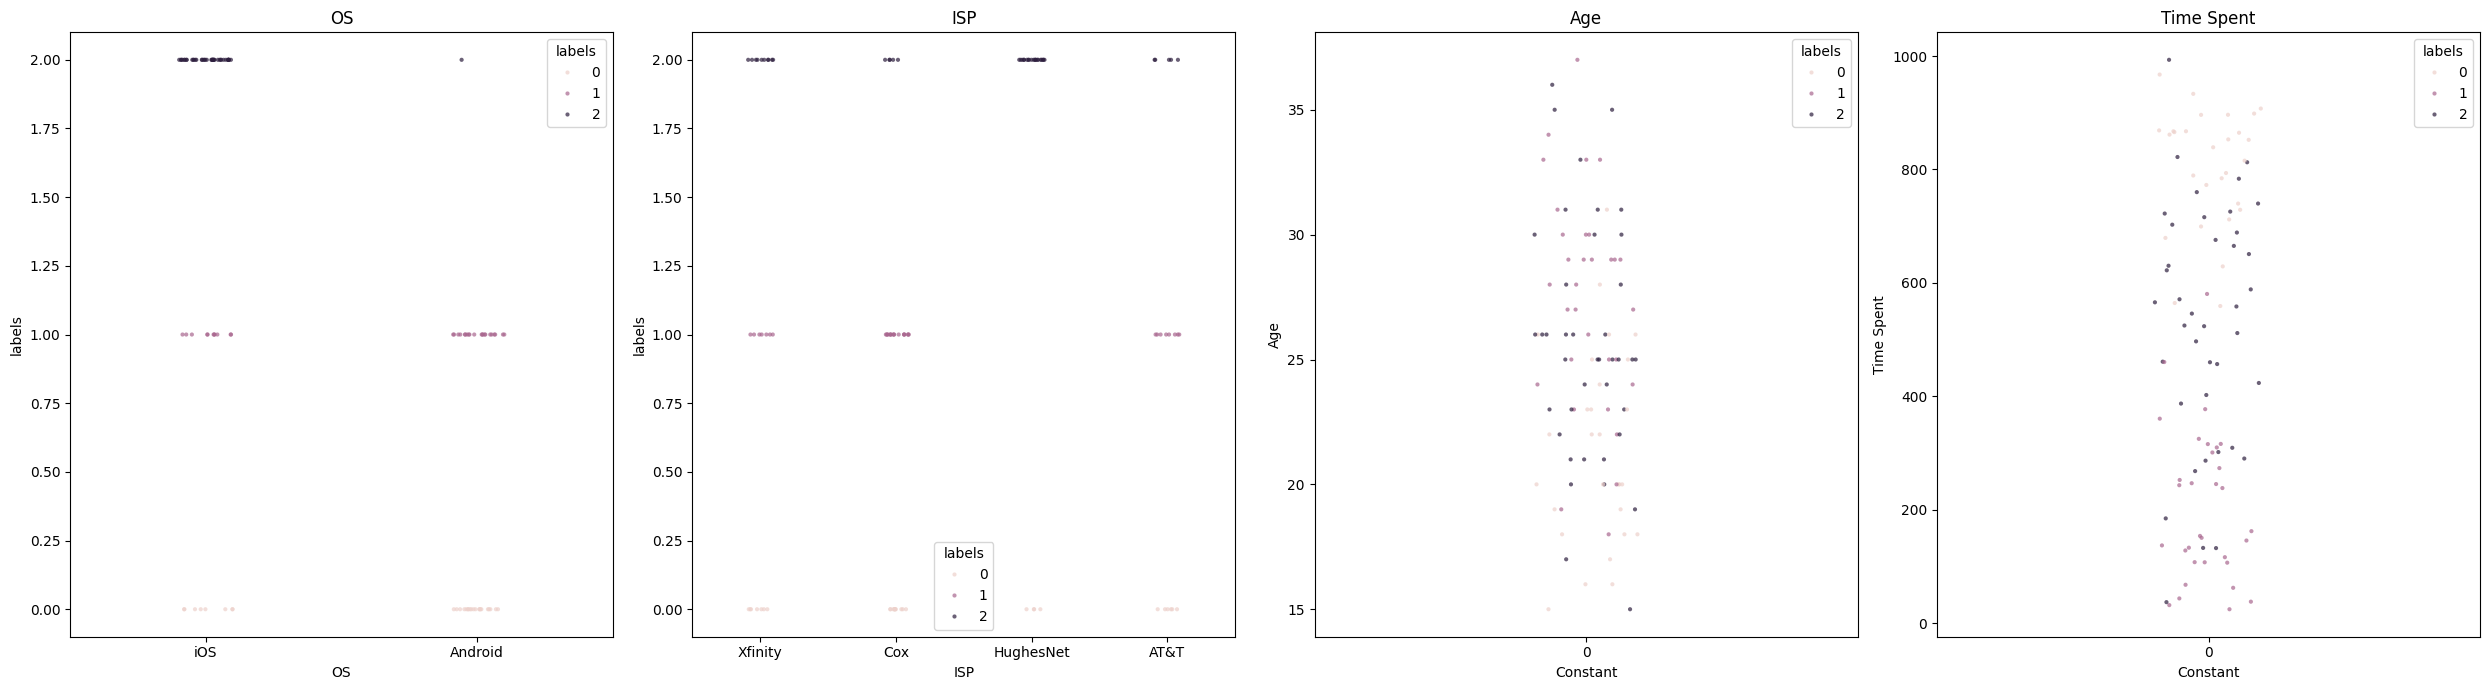

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


labeledCustomers['Constant'] = 0  # dummy feature for plotting

# Crear una figura con 4 subplots
f, axes = plt.subplots(1, 4, figsize=(25, 7), sharex=False)
f.subplots_adjust(hspace=0.2, wspace=0.7)

# Iterar a través de los primeros 4 columns
for i in range(4):
    col = labeledCustomers.columns[i]
    if i < 2:
        # Usar stripplot en lugar de swarmplot para evitar el warning
        sns.stripplot(x=col, y='labels', hue='labels', data=labeledCustomers, ax=axes[i], 
                     size=3, jitter=True, alpha=0.7)
        axes[i].set_title(col)
    else:
        # Para los valores numéricos usar Constant como x
        sns.stripplot(x='Constant', y=col, hue='labels', data=labeledCustomers, ax=axes[i], 
                     size=3, jitter=True, alpha=0.7)
        axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Clustering method 2: K-means with one hot encoding

Cluster data using the k-means algorithm. 

The k-means algorithm only works with continuos values. We start be one hot encoding our categorical features. 

In [15]:
customers_norm = pd.get_dummies(customers_norm, columns=["OS","ISP"])

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
clusters = kmeans.fit_predict(customers_norm)
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((customers,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

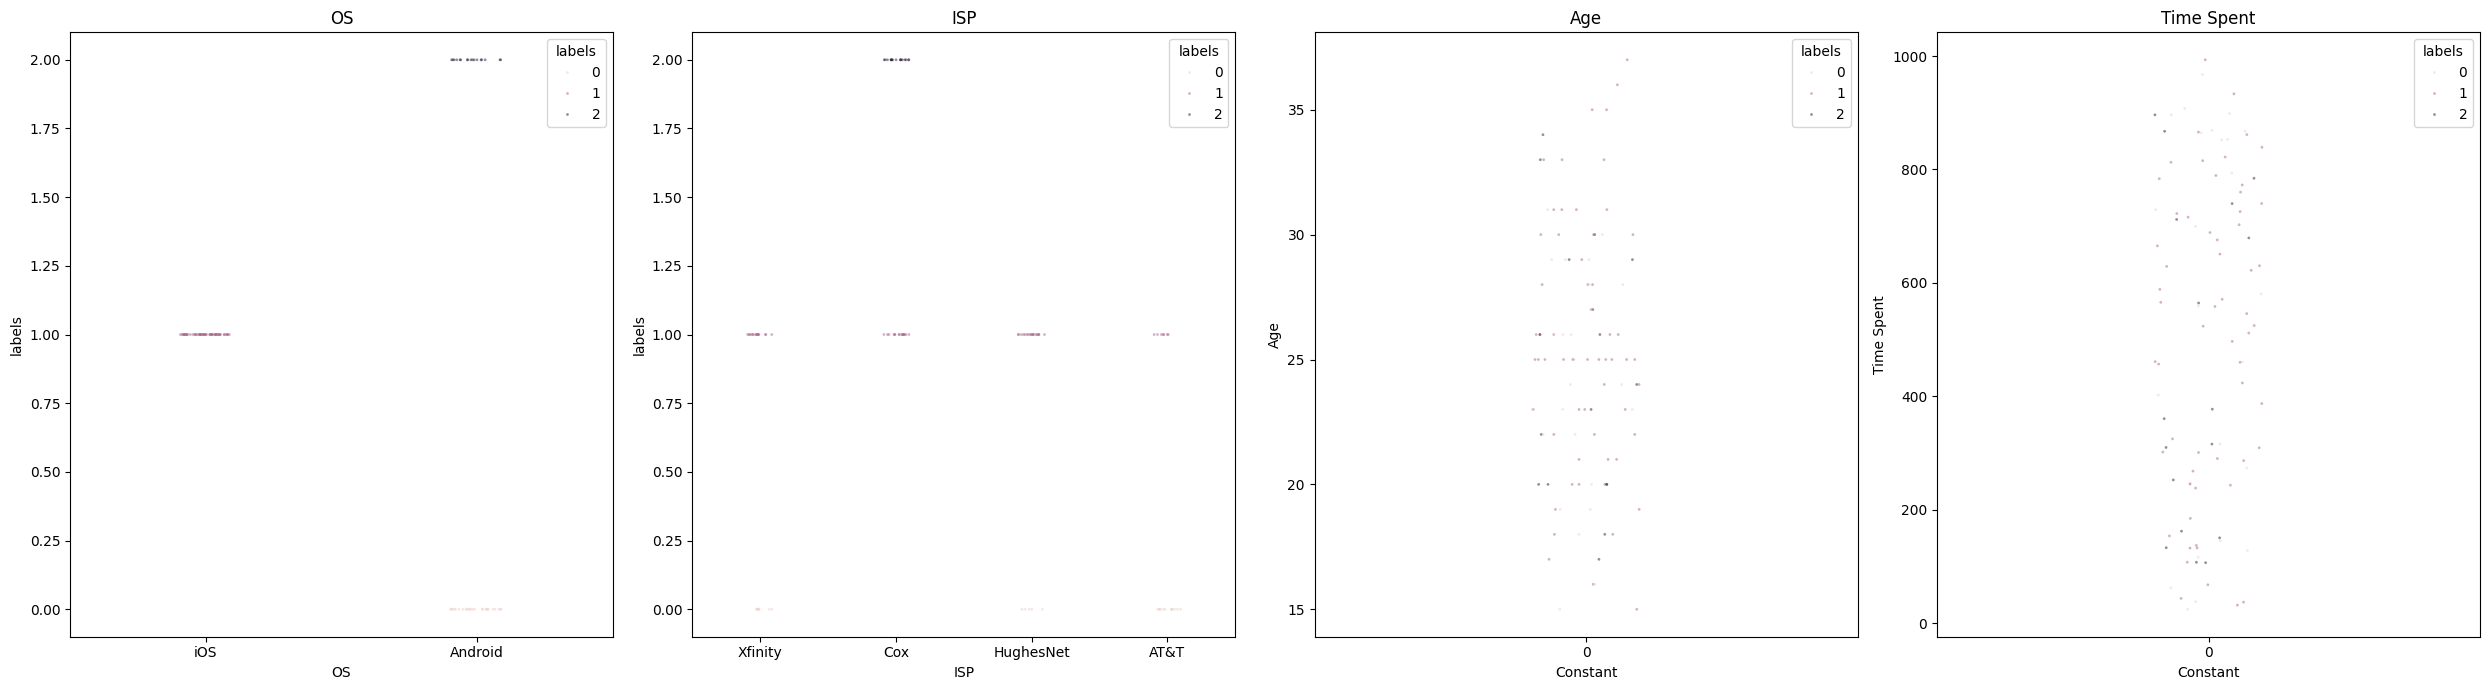

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming labeledCustomers is defined elsewhere
# Add this dummy feature for plotting
labeledCustomers['Constant'] = 0 

# Create figure and subplots
fig, axes = plt.subplots(1, 4, figsize=(25, 7), sharex=False)
fig.subplots_adjust(hspace=0.2, wspace=0.5)

# Loop through the columns to create plots
for i in range(4):
    col = labeledCustomers.columns[i]
    
    if i < 2:
        # For first two columns, use stripplot instead of swarmplot
        # stripplot doesn't try to avoid overlapping points and works better for dense data
        sns.stripplot(x=col, y='labels', hue='labels', data=labeledCustomers, 
                      ax=axes[i], size=2, jitter=True, alpha=0.5)
        axes[i].set_title(col)
    else:
        # For the remaining columns
        sns.stripplot(x='Constant', y=col, hue='labels', data=labeledCustomers, 
                      ax=axes[i], size=2, jitter=True, alpha=0.5)
        axes[i].set_title(col)

plt.tight_layout()
plt.show()